# **CENSUS INCOME PROJECT**

In this project, initially you need to preprocess the data and then develop an
understanding of the different features of the data by performing exploratory
analysis and creating visualizations. Further, after having sufficient knowledge
about the attributes, you will perform a predictive task of classification to predict
whether an individual makes over 50,000 a year or less by using different
machine learning algorithms.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **Data Information**

- last column is income so I will rename it to Annual Income
- age: the age of an individual.
- workclass: The type of work or employment of an individual. It can have the following categories:
    - Private: Working in the private sector.
    - Self-emp-not-inc: Self-employed individuals who are not incorporated.
    - Self-emp-inc: Self-employed individuals who are incorporated.
    - Federal-gov: Working for the federal government.
    - Local-gov: Working for the local government.
    - State-gov: Working for the state government.
    - Without-pay: Not working and without pay.
    - Never-worked: Never worked before.
- Final Weight: The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls.
- education: The highest level of education completed.
- education-num: The number of years of education completed.
- marital-status: The marital status.
    -  Married-civ-spouse corresponds to a civilian spouse
    -  Married-AF-spouse is a spouse in the Armed Forces
- occupation: Type of work performed by an individual.
- relationship: The relationship status.
- race: The race of an individual.
- sex: The gender of an individual.
- capital-gain: The amount of capital gain (financial profit).
- capital-loss: The amount of capital loss an individual has incurred.
- hours-per-week: The number of hours works per week.
- native-country: The country of origin or the native country.
- income: The income level of an individual and serves as the target variable. It indicates whether the income is greater than $50,000 or less than or equal to $50,000, denoted as (>50K, <=50K).

In [2]:
df = pd.read_csv("census-income.csv",skipinitialspace= True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.rename(columns={df.columns[-1]: 'Annual_income'}, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Annual_income     0
dtype: int64

In [7]:
# Feature names
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Annual_income'],
      dtype='object')

In [8]:
# cheking unique values in object data type to identify if there are any unidentifable value
for i in df.columns:
    if df[i].dtype == 'object':
        print('Column : ',i)
        print('unique values : ')
        print(df[i].unique())
        print("----------------------------------------------------------------")

Column :  workclass
unique values : 
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
----------------------------------------------------------------
Column :  education
unique values : 
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
----------------------------------------------------------------
Column :  marital-status
unique values : 
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
----------------------------------------------------------------
Column :  occupation
unique values : 
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
----

- there is '?' in workclass,occupation and native-country

In [9]:
NA_columns = ['workclass','occupation','native-country']
for i in NA_columns:
    print(f'No. of records with `?` in {i} = {df[df[i] == "?"].shape[0]}') 

No. of records with `?` in workclass = 1836
No. of records with `?` in occupation = 1843
No. of records with `?` in native-country = 583


In [10]:
df= df.replace({"?": np.nan})
#check perecentage of null values
df.isnull().sum() / len(df) * 100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.790486
Annual_income     0.000000
dtype: float64

In [11]:
# checking total percentage of missing values
count=df.isnull().sum().sum()
total=df.shape[0]
count/total*100

13.08927858481005

In [12]:
# since its very less I will just drop them
df.dropna(inplace = True)
df.shape

(30162, 15)

In [13]:
# Checking duplicates
df.duplicated().sum()

23

In [14]:
df.drop_duplicates(inplace = True)

In [15]:
df.shape

(30139, 15)

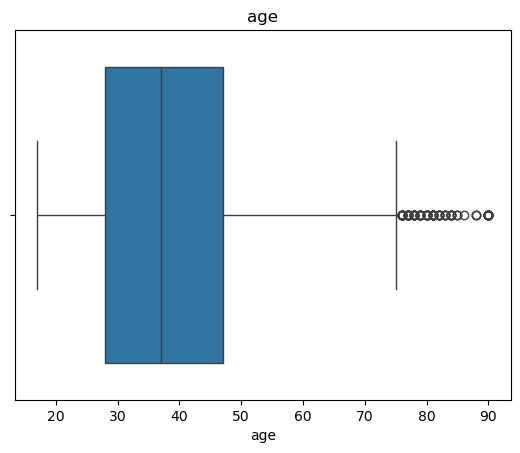

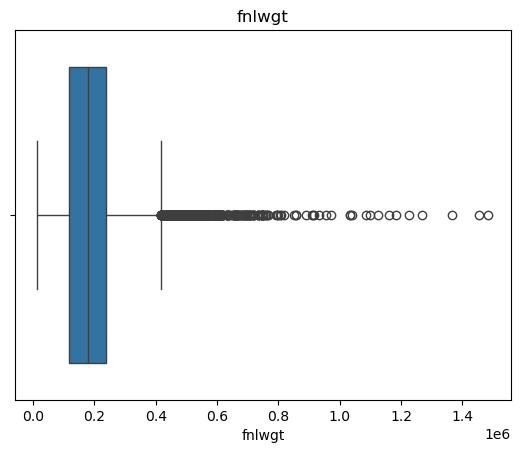

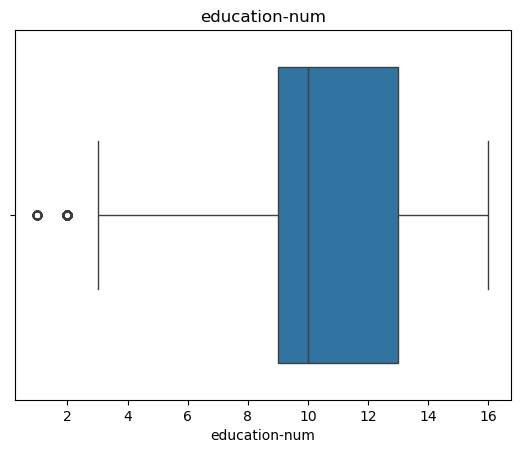

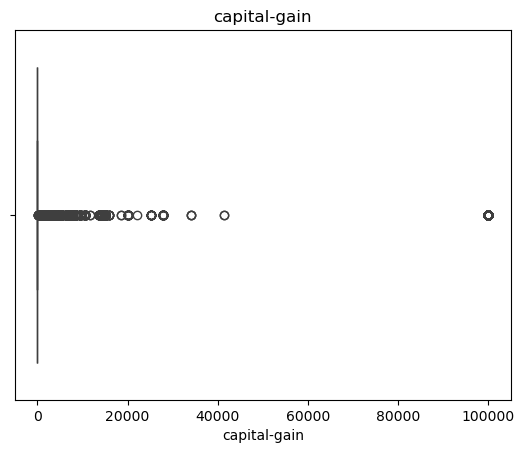

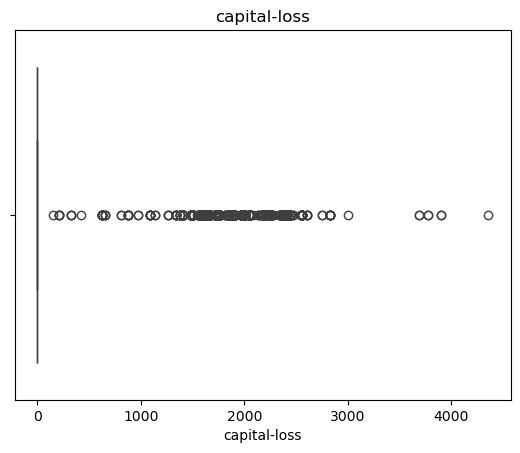

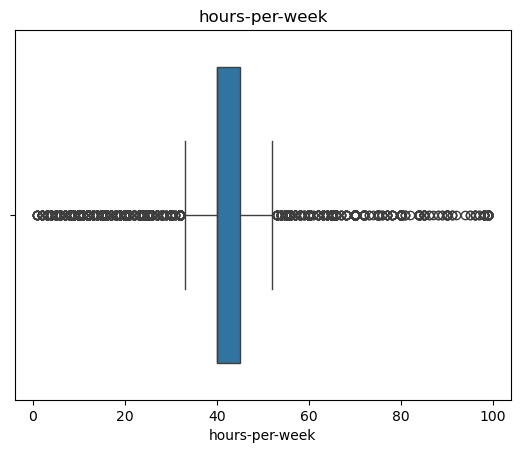

In [16]:
for col in df.columns:
  if df[col].dtype != "object":
    sns.boxplot(data =df,x =col)
    plt.title(col)
    plt.show()

- all the columns showing outlier are very important so I won't remove them

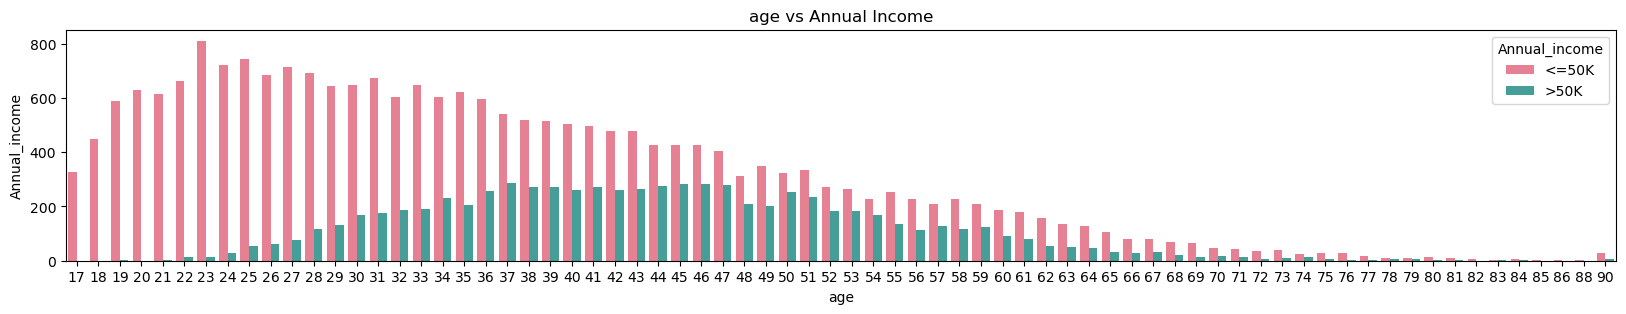

In [17]:
plt.figure(figsize=(20, 3))
sns.countplot(x=df['age'], data=df, hue=df["Annual_income"], palette="husl")
plt.title('age vs Annual Income')
plt.xlabel('age')
plt.ylabel('Annual_income')
plt.show()

- people with annual income > 50K increases with increase in age 

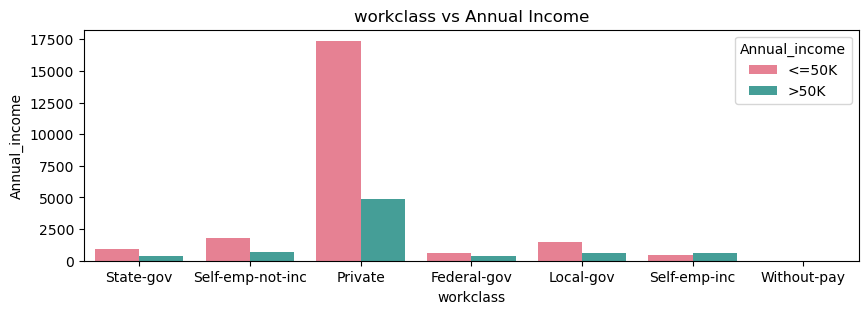

In [18]:
plt.figure(figsize=(10, 3))
sns.countplot(x=df['workclass'], data=df, hue=df["Annual_income"], palette="husl")
plt.title('workclass vs Annual Income')
plt.xlabel('workclass')
plt.ylabel('Annual_income')
plt.show()

- Private sector has most people with income >50K and <50K
- self employed category has greater no. people with income >50k than with income <50K 

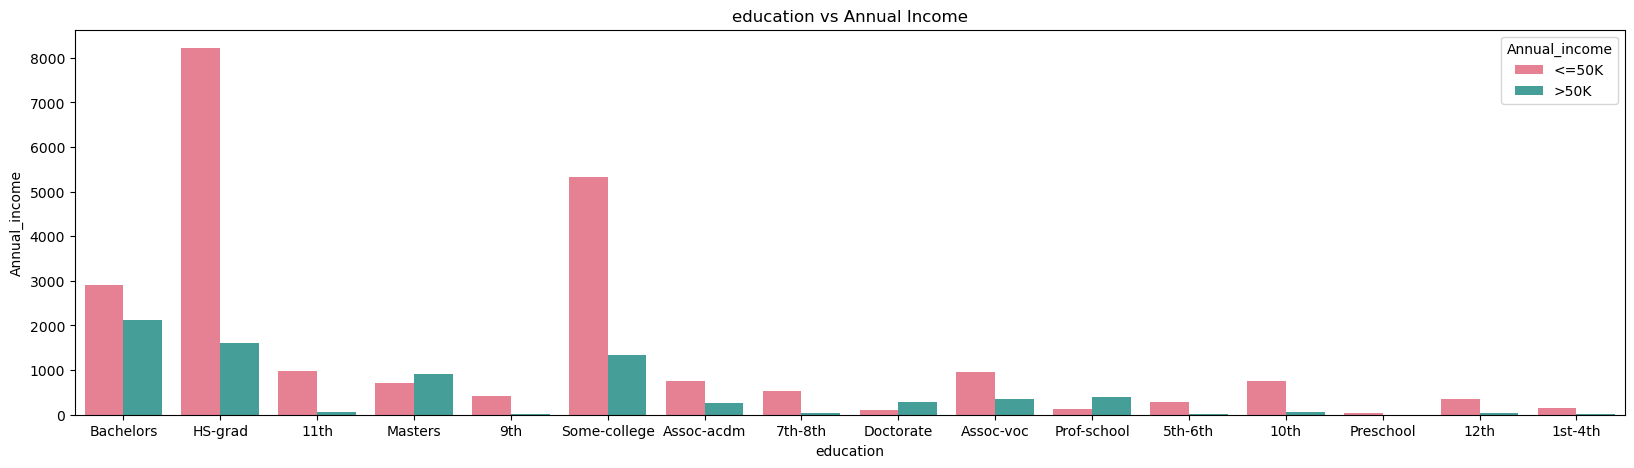

In [19]:
plt.figure(figsize=(20, 5))
sns.countplot(x=df['education'], data=df, hue=df["Annual_income"], palette="husl")
plt.title('education vs Annual Income')
plt.xlabel('education')
plt.ylabel('Annual_income')
plt.show()

- Bachelors have highest no. of people with income >50K
- HS-grad have highest no. of people with income <50K
- higher the education, better the chances of having income >50K

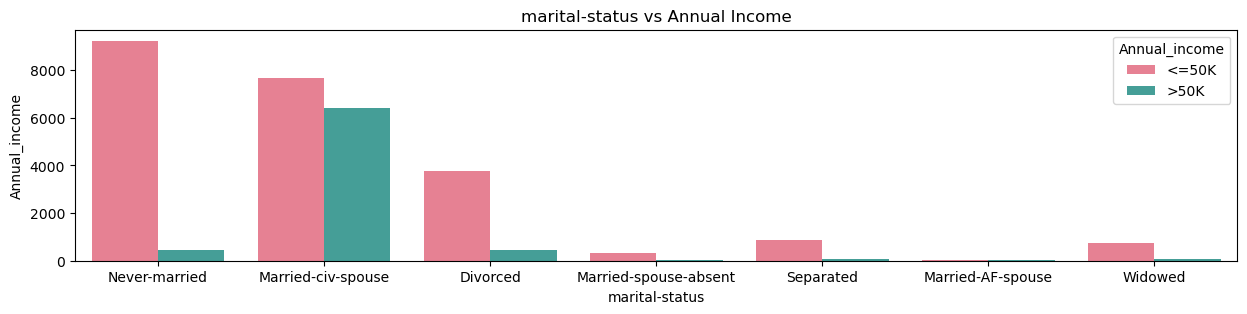

In [20]:
plt.figure(figsize=(15, 3))
sns.countplot(x=df['marital-status'], data=df, hue=df["Annual_income"], palette="husl")
plt.title('marital-status vs Annual Income')
plt.xlabel('marital-status')
plt.ylabel('Annual_income')
plt.show()

- Married-civ-spouse have more no. of people with income >50K
- Never-married category has higgest no. of people with income <50K and it shows the greatest variance in income

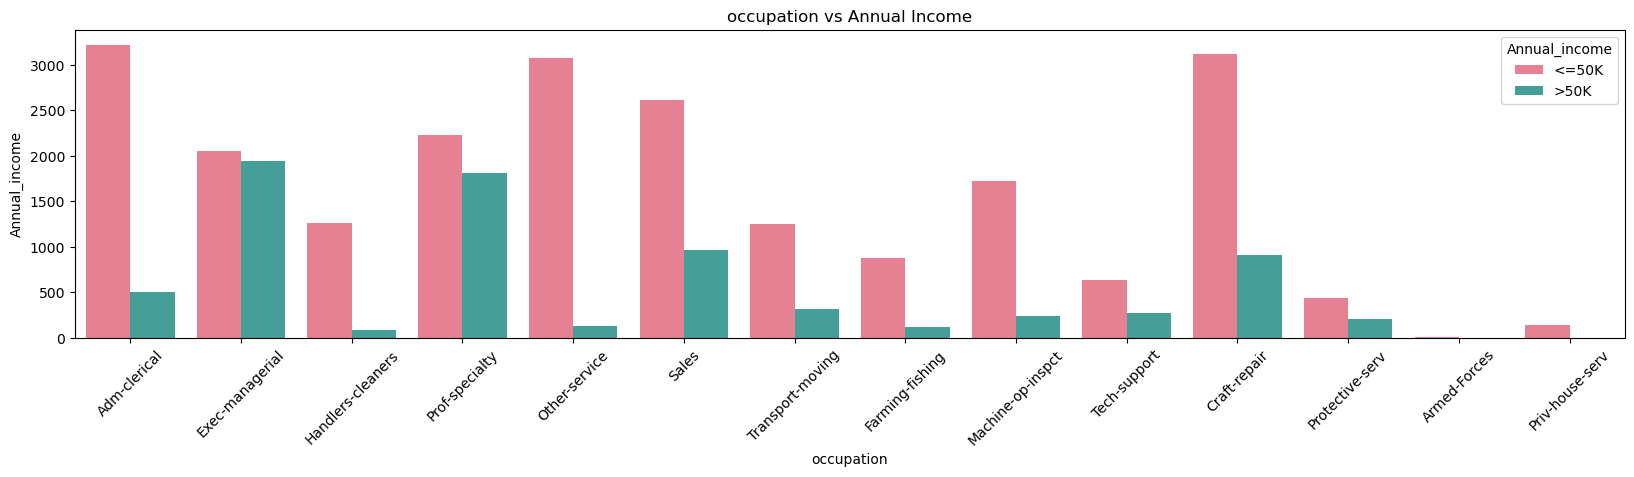

In [21]:
plt.figure(figsize=(20, 4))
sns.countplot(x=df['occupation'], data=df, hue=df["Annual_income"], palette="husl")
plt.title('occupation vs Annual Income')
plt.xlabel('occupation')
plt.xticks(rotation=45)
plt.ylabel('Annual_income')
plt.show()

- Exec-managerial and Prof-speciality category has the highest no. of prople with income > 50K
- Adm-clerical and craft-repair occupation has the highest no. of people with income <50K

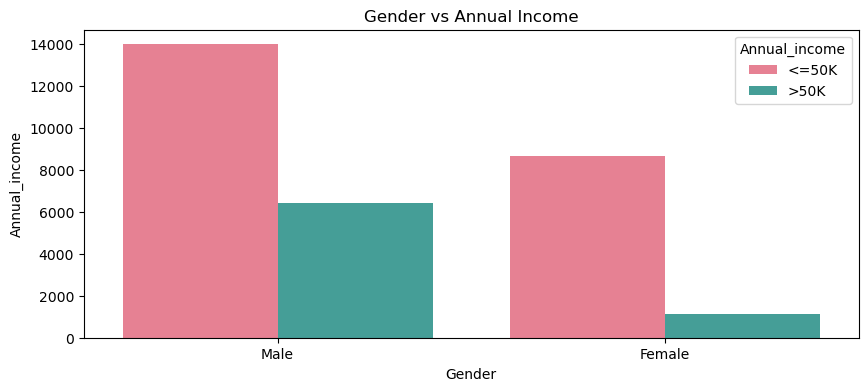

In [22]:
plt.figure(figsize=(10, 4))
sns.countplot(x=df['sex'], data=df, hue=df["Annual_income"], palette="husl")
plt.title('Gender vs Annual Income')
plt.xlabel('Gender')
plt.ylabel('Annual_income')
plt.show()

- Males have more no. of people with income >50K then woman, nut our data has more data for <=50k so its hard to compare in that field

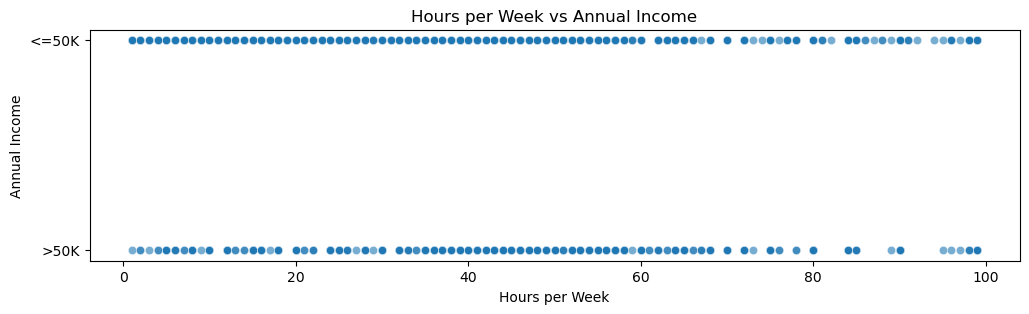

In [23]:
plt.figure(figsize=(12, 3))
sns.scatterplot(x="hours-per-week", y="Annual_income", data=df, alpha=0.6)
plt.title("Hours per Week vs Annual Income")
plt.xlabel("Hours per Week")
plt.ylabel("Annual Income")
plt.show()


- for people with income >50K work 30 to 70 hours per week atleast

In [24]:
#label enocoding --- original vs encoded
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col]) # it will transform data in the data set as well
        print(f'Column Name : {col}')
        print("Original ---> Encoded")
        for original_class,encoded_value in zip(le.classes_,le.transform(le.classes_)):
            print(f'{original_class}->{encoded_value}')
        print()

Column Name : workclass
Original ---> Encoded
Federal-gov->0
Local-gov->1
Private->2
Self-emp-inc->3
Self-emp-not-inc->4
State-gov->5
Without-pay->6

Column Name : education
Original ---> Encoded
10th->0
11th->1
12th->2
1st-4th->3
5th-6th->4
7th-8th->5
9th->6
Assoc-acdm->7
Assoc-voc->8
Bachelors->9
Doctorate->10
HS-grad->11
Masters->12
Preschool->13
Prof-school->14
Some-college->15

Column Name : marital-status
Original ---> Encoded
Divorced->0
Married-AF-spouse->1
Married-civ-spouse->2
Married-spouse-absent->3
Never-married->4
Separated->5
Widowed->6

Column Name : occupation
Original ---> Encoded
Adm-clerical->0
Armed-Forces->1
Craft-repair->2
Exec-managerial->3
Farming-fishing->4
Handlers-cleaners->5
Machine-op-inspct->6
Other-service->7
Priv-house-serv->8
Prof-specialty->9
Protective-serv->10
Sales->11
Tech-support->12
Transport-moving->13

Column Name : relationship
Original ---> Encoded
Husband->0
Not-in-family->1
Other-relative->2
Own-child->3
Unmarried->4
Wife->5

Column Name :

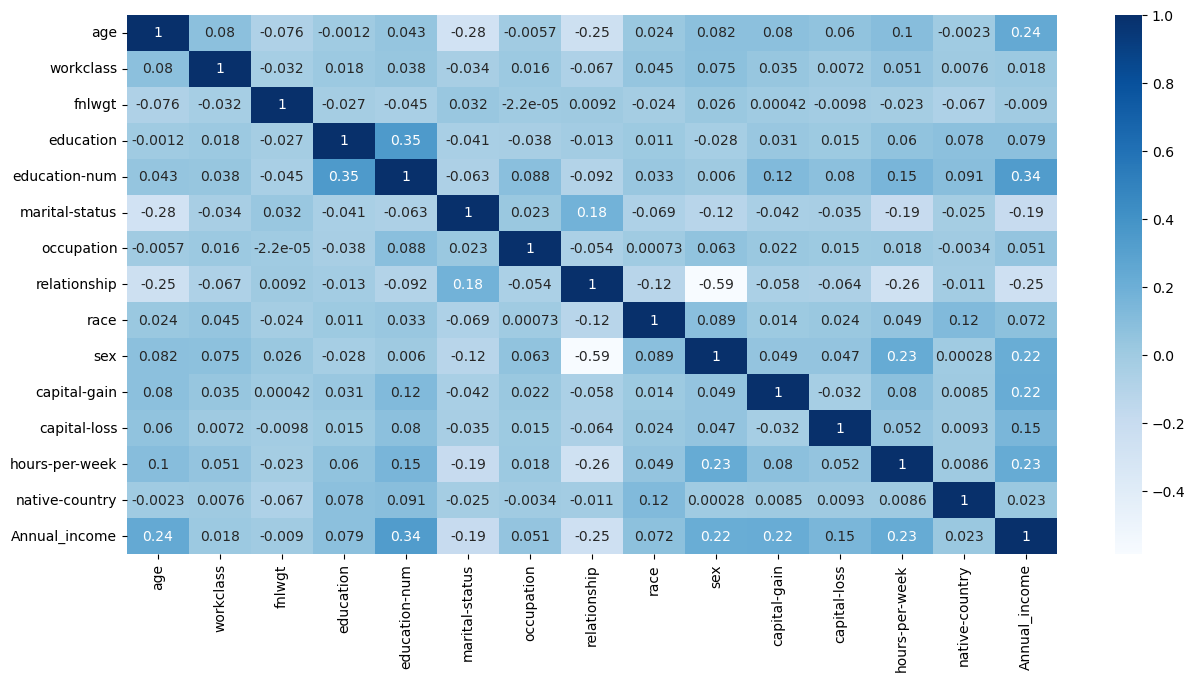

In [25]:
plt.figure(figsize =(15,7))
sns.heatmap(df.corr(),annot = True,cmap ="Blues")
plt.show()

In [26]:
#model building

from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [27]:
# independent variable
x = df.drop("Annual_income",axis=1)
# dependent variable
y = df["Annual_income"]

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [29]:
print('size of training set : ',x_train.shape[0])
print('size of testing set : ',x_test.shape[0])

size of training set :  22604
size of testing set :  7535


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [31]:
# Models dictionary
models = {
    "Logistic Regression": LogisticRegression(solver="saga", max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}


Logistic Regression
Accuracy: 82.3490
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      5626
           1       0.74      0.47      0.57      1909

    accuracy                           0.82      7535
   macro avg       0.79      0.71      0.73      7535
weighted avg       0.81      0.82      0.81      7535



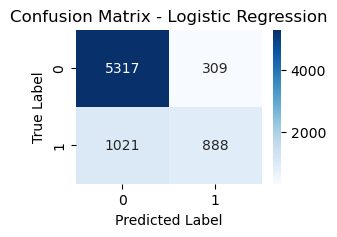


Decision Tree
Accuracy: 80.5309
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      5626
           1       0.61      0.63      0.62      1909

    accuracy                           0.81      7535
   macro avg       0.74      0.75      0.74      7535
weighted avg       0.81      0.81      0.81      7535



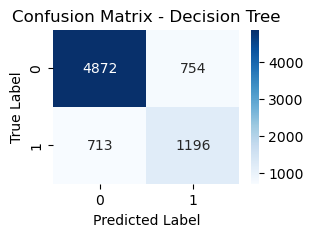


Random Forest
Accuracy: 85.6669
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      5626
           1       0.76      0.63      0.69      1909

    accuracy                           0.86      7535
   macro avg       0.82      0.78      0.80      7535
weighted avg       0.85      0.86      0.85      7535



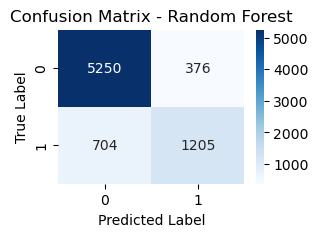


Support Vector Machine
Accuracy: 84.3397
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      5626
           1       0.77      0.55      0.64      1909

    accuracy                           0.84      7535
   macro avg       0.81      0.75      0.77      7535
weighted avg       0.84      0.84      0.83      7535



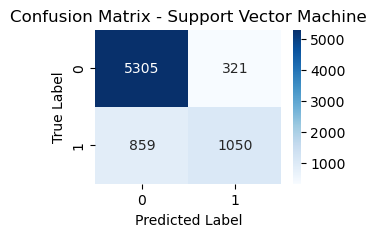

In [32]:

# Iterate over models
for name, model in models.items():
    print(f"\n{'='*60}\n{name}\n{'='*60}")
    
    # Train model
    model.fit(x_train, y_train)
    
    # Predictions
    y_pred = model.predict(x_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)*100
    print(f"Accuracy: {accuracy:.4f}")
    
    # Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


### **Random Forest > SVM > Logistic Regression > Decision Tree**